# Getting Started with Audio Data

#### Ryan Bales (@ryanbales)<br>ryan@balesofdata.com

***

### Import Packages

In [3]:
import librosa
import librosa.display
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Define Constants

In [4]:
num_mfccs = 20
max_feature_length = 128

train_data_path = "data/audio_train/train/"
val_data_path = "data/audio_train/validation/"

model_output_path = "models/mfcc/"

#### Review Audio File

In [5]:
import IPython.display as ipd
ipd.Audio("{}Applause/170eeda2.wav".format(train_data_path))

### Extracting Features from Audio Files

#### Let's take a look at the Librosa Python Library

In [6]:
raw_audio, sample_rate = librosa.load("{}Applause/170eeda2.wav".format(train_data_path), sr=None)

In [7]:
raw_audio

array([ 3.0517578e-05,  3.0517578e-05,  3.0517578e-05, ...,
       -6.1035156e-05,  6.1035156e-05, -3.0517578e-05], dtype=float32)

In [8]:
raw_audio.shape

(312228,)

In [9]:
sample_rate

44100

#### Visualize the RAW Audio

Text(0.5, 1.0, 'RAW Audio')

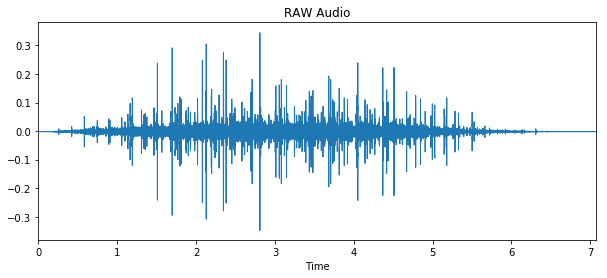

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.waveplot(raw_audio, sr=sample_rate)
plt.title('RAW Audio')

#### Extract MFCCs using Librosa

In [11]:
mfccs = librosa.feature.mfcc(y=raw_audio, sr=sample_rate, n_mfcc=num_mfccs)

In [12]:
mfccs

array([[-8.33012490e+02, -8.26159342e+02, -8.09545148e+02, ...,
        -8.17940993e+02, -8.27972441e+02, -8.33583067e+02],
       [ 3.43179270e+00,  1.14908740e+01,  2.63001145e+01, ...,
         2.30443836e+01,  1.37528751e+01,  4.16150016e+00],
       [-1.01470551e+00,  4.82294372e+00,  1.18058330e+01, ...,
         9.53275482e+00,  8.09003604e+00,  4.10019706e+00],
       ...,
       [ 1.60962695e+00, -1.64467149e+00, -4.76585816e+00, ...,
         8.45138674e+00,  4.30276640e+00,  1.39667285e+00],
       [ 7.98147871e-01,  1.50607282e+00, -4.91686060e+00, ...,
         7.56358810e+00,  4.02862417e+00, -1.61518829e-01],
       [-3.93310439e-01,  2.42145825e+00, -1.11721946e-01, ...,
         6.51856487e+00,  5.70180846e+00,  2.37487586e+00]])

In [13]:
mfccs.shape

(20, 610)

#### Visualize the MFCCs

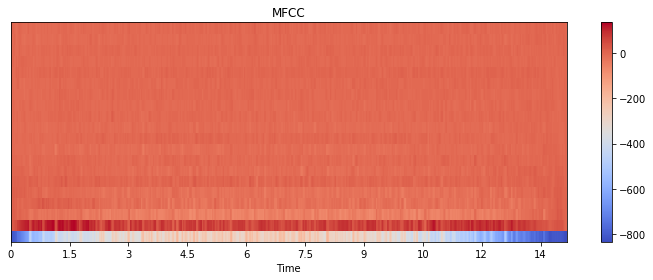

In [14]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

#### Extract the Chromagram using Librosa

In [15]:
chroma = librosa.feature.chroma_stft(y=raw_audio, sr=sample_rate)

In [16]:
chroma

array([[0.45708603, 0.59985061, 0.85535656, ..., 0.53766656, 1.        ,
        0.78869527],
       [0.75006506, 0.74879897, 0.63880852, ..., 0.35619509, 0.80814518,
        0.90725799],
       [1.        , 0.88681515, 0.61255202, ..., 0.44212162, 0.73436712,
        0.97452743],
       ...,
       [0.76023411, 0.83820057, 0.8286142 , ..., 0.42432648, 0.98814941,
        0.9980946 ],
       [0.52218087, 0.59695499, 0.94210506, ..., 0.61444451, 0.90883874,
        1.        ],
       [0.55180056, 0.58229351, 0.95294395, ..., 1.        , 0.88406898,
        0.86646533]])

In [17]:
chroma.shape

(12, 610)

#### Visualize the Chromagam

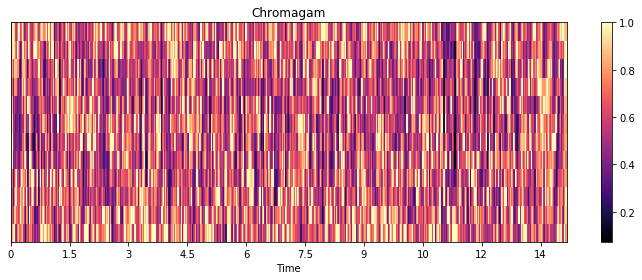

In [18]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time')
plt.colorbar()
plt.title('Chromagam')
plt.tight_layout()

#### Extract the Spectrogram

In [19]:
spec = librosa.feature.melspectrogram(y=raw_audio, sr=sample_rate, 
                                      n_fft=512, hop_length=256, n_mels=128, fmin=0.0, fmax=3500)
spec

/Users/rbales/.virtualenvs/audio-data-insights/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.04100955e-09, 2.12601071e-09, 9.80906434e-10, ...,
        7.18903860e-09, 1.89889787e-09, 1.92905921e-09],
       [6.05896979e-09, 2.86882005e-09, 1.25848265e-09, ...,
        1.06079503e-08, 1.67630346e-09, 2.26311702e-09],
       [1.22060907e-08, 1.56930422e-09, 1.67710637e-08, ...,
        1.45333827e-08, 1.33213391e-09, 5.23379030e-09]])

In [23]:
spec.shape

(128, 1220)

### Convert the Spectrogram from Power to DB

In [24]:
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_db

array([[-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -79.82443261, ..., -80.        ,
        -80.        , -80.        ]])

In [25]:
spec_db.shape

(128, 1220)

#### Visualize the Spectrogram

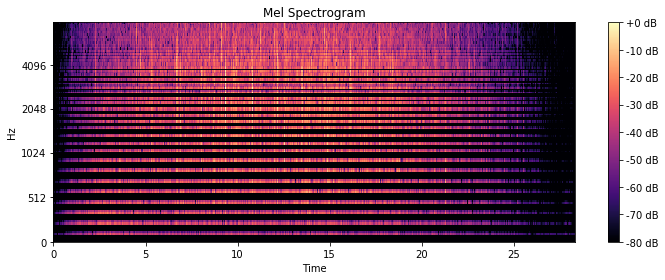

In [26]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db,y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()